### Week 1 To build a classifiaction model using CNN

This assignment has a trained model to run and calsiify between cats vs dogs 
 

Model architecture 
- so the input layer which wile be the size of th image 
- Few Conv2d layers
- Each conv2d follwed by maxpooling layer then flattened   
- may have one last dense layers
- finally  last layer with 2 nodes for cat or dog
- using softmax activation i will and Binary_cross_entropy i will find the probabilities of the class
- the max probability is the predicted class
-

In [2]:
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random


from tensorflow.keras.layers import Conv2D,Add,MaxPooling2D, Dense, BatchNormalization,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten


In [6]:
class_names = ['Cat', 'Dog'] 
dog_path = 'archive/PetImages/Dog'
cat_path = 'archive/PetImages/Cat'
n_dogs = len(os.listdir(dog_path))
n_cats = len(os.listdir(cat_path))
n_images = [n_cats, n_dogs]
print(n_cats,n_dogs)


12499 12499


In [7]:
import os

# Create the full directory structure
os.makedirs('archive/tmp/training/cats', exist_ok=True)
os.makedirs('archive/tmp/training/dogs', exist_ok=True)

os.makedirs('archive/tmp/test/cats', exist_ok=True)
os.makedirs('archive/tmp/test/dogs', exist_ok=True)


In [8]:
train_cat = 'archive/tmp/training/cats'
train_dog = 'archive/tmp/training/dogs'
test_cat = 'archive/tmp/test/cats'
test_dog = 'archive/tmp/test/dogs'
validation_cat = 'archive/tmp/validation/cats'
validation_dog = 'archive/tmp/validation/dogs'


In [63]:
def split_and_move_images(source_path, train_path, test_path,validation_path, split_ratio=0.7):
    # Get all image files
    images = os.listdir(source_path)
    random.shuffle(images)  # Shuffle to randomize the split
    
    # Calculate split index
    split_index = int(len(images) * split_ratio)
    
    # Split the images into training and testing sets
    train_images = images[:split_index]
    test_images = images[split_index:-split_index//2]
    validation_images = images[-split_index//2:]
    
    # Move the images to the respective folders
    for image in train_images:
        shutil.copy(os.path.join(source_path, image), os.path.join(train_path, image))
    print(f"Train Dataset{source_path} has been successfully split and moved.")
    for image in test_images:
        shutil.copy(os.path.join(source_path, image), os.path.join(test_path, image))
    
    print(f"Test Dataset{source_path} has been successfully split and moved.")
    for image in validation_images:
        shutil.copy(os.path.join(source_path, image), os.path.join(validation_path, image))
    
    print(f"validtion Dataset{source_path} has been successfully split and moved.")

# Split and move cat images
split_and_move_images(cat_path, train_cat, test_cat,validation_cat)

# Split and move dog images
split_and_move_images(dog_path, train_dog, test_dog,validation_dog)


In [10]:

images = os.listdir(train_cat)
print(len(images))
images = os.listdir(validation_cat)
print(len(images))
images = os.listdir(test_cat)
print(len(images))

images = os.listdir(train_dog)
print(len(images))
images = os.listdir(validation_dog)
print(len(images))
images = os.listdir(test_dog)
print(len(images))

11277
625
625
11249
625
625


In [11]:
model = Sequential(
    [               
        Input(shape=(100, 100, 3), name='Input_layer'),   
        
        # First Conv Layer
        Conv2D(64, (10, 10), activation='relu'),
        MaxPooling2D(pool_size=(2, 2), padding='same'),
        
        # Second Conv Layer
        Conv2D(128, (7, 7), activation='relu'),
        MaxPooling2D(pool_size=(2, 2), padding='same'),
        
        # Third Conv Layer
        Conv2D(128, (4, 4), activation='relu'),
        MaxPooling2D(pool_size=(2, 2), padding='same'),
        
        # Fourth Conv Layer
        Conv2D(256, (4, 4), activation='relu'),
        
        # Flatten and Dense Layer
        Flatten(),
        Dense(512, activation='relu'),  # Smaller Dense Layer
        
        # Output Layer (sigmoid for binary classification)
        Dense(1, activation='sigmoid')  # For binary classification (1 output unit)
    ], name="my_model"
)                  

In [12]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,927,233 (22.61 MB)

 Trainable params: 5,927,233 (22.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
class_names = ['Cat', 'Dog']
def plot_data(generator, n_images):
    """
    Plots random data from dataset
    Args:
    generator: a generator instance
    n_images : number of images to plot
    """
    i = 1
    images, labels = next(generator)
    labels = labels.astype('int32')

    plt.figure(figsize=(14, 15))
    
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == n_images+1:
            break
    
    plt.show()

In [14]:
learning_rate = 0.0005 # You can adjust this value to your needs

# Create the Adam optimizer with the new learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile your model with the new optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

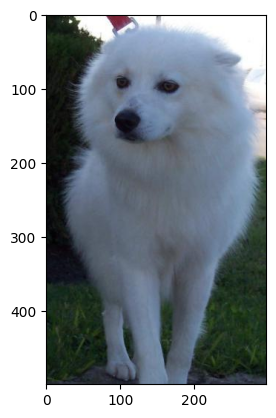

In [16]:
immg = plt.imread('archive/tmp/training/dogs/31.jpg')
plt.imshow(immg)

In [18]:
# Paths
train_dir = 'archive/tmp/training'
test_dir = 'archive/tmp/test'
val_dir = 'archive/tmp/validation'
# Data generators with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    shear_range=0.2,  # Randomly shear images
    zoom_range=0.2,   # Randomly zoom in images
    horizontal_flip=True,  # Randomly flip images horizontally
    # validation_split=0.2  # Use 20% of data for validation
)
validation_datagen=  ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test set

# Load images from the directories and apply the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),  # Resize all images to 100x100
    batch_size=64,  # Number of images per batch
    class_mode='binary',  # Binary classification (cats vs. dogs)
    # subset='training'  # Use subset for training
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(100, 100),  # Resize all images to 100x100
    batch_size=64,  # Number of images per batch
    class_mode='binary',  # Binary classification (cats vs. dogs)
    # subset='validation'  # Use subset for validation
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),  # Resize all images to 100x100
    batch_size=64,  # Number of images per batch
    class_mode='binary'  # Binary classification (cats vs. dogs)
)

Found 22526 images belonging to 2 classes.
Found 1250 images belonging to 2 classes.
Found 1250 images belonging to 2 classes.


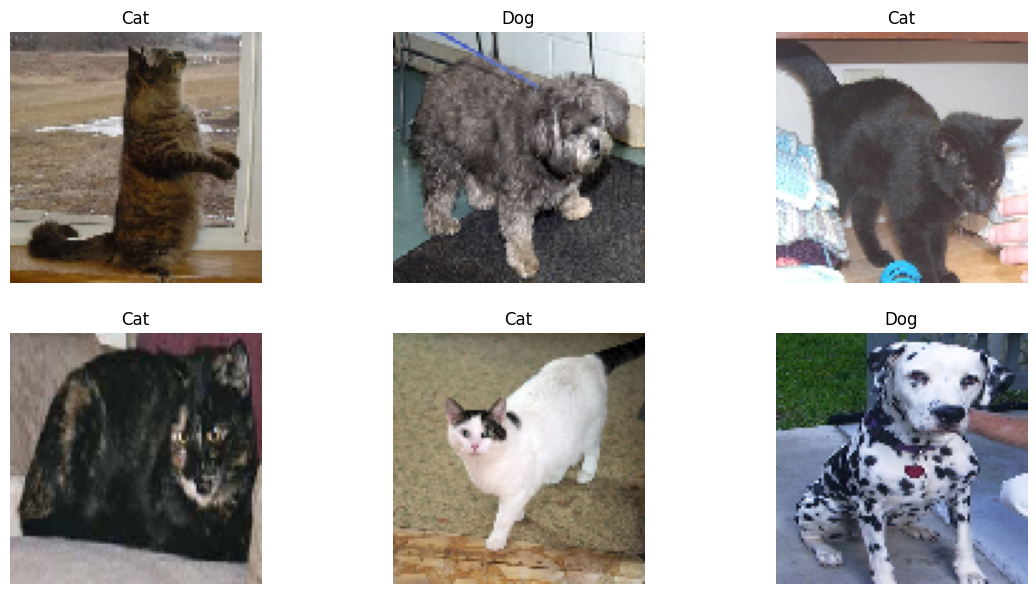

In [23]:
plot_data(validation_generator,6)

In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of steps per epoch
    epochs=50,  # Number of epochs
    validation_data=validation_generator,  # Use validation data from the validation generator
    validation_steps=validation_generator.samples // validation_generator.batch_size  # Number of steps for validation
)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
216/351 ━━━━━━━━━━━━━━━━━━━━ 6:14 3s/step - accuracy: 0.5076 - loss: 0.7004

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5084 - loss: 0.6980

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 975s 3s/step - accuracy: 0.5084 - loss: 0.6980 - val_accuracy: 0.5016 - val_loss: 0.7052
Epoch 2/50
  1/351 ━━━━━━━━━━━━━━━━━━━━ 8:40 1s/step - accuracy: 0.4688 - loss: 0.7227

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - accuracy: 0.4688 - loss: 0.7227 - val_accuracy: 0.4412 - val_loss: 0.7076
Epoch 3/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 578s 2s/step - accuracy: 0.5169 - loss: 0.6910 - val_accuracy: 0.5740 - val_loss: 0.6660
Epoch 4/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 654us/step - accuracy: 0.6875 - loss: 0.6365 - val_accuracy: 0.5882 - val_loss: 0.6544
Epoch 5/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 596s 2s/step - accuracy: 0.6272 - loss: 0.6457 - val_accuracy: 0.6464 - val_loss: 0.6303
Epoch 6/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.6719 - loss: 0.6302 - val_accuracy: 0.5588 - val_loss: 0.6584
Epoch 7/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 596s 2s/step - accuracy: 0.6569 - loss: 0.6190 - val_accuracy: 0.6546 - val_loss: 0.6095
Epoch 8/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 934us/step - accuracy: 0.7500 - loss: 0.5568 - val_accuracy: 0.6765 - val_loss: 0.5525
Epoch 9/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - accuracy: 0.6862 - loss: 0.5869 - val_accuracy: 0

In [25]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 701ms/step - accuracy: 0.8502 - loss: 0.3710
Test loss: 0.3687205910682678
Test accuracy: 0.8503289222717285


In [26]:
model.save('E:/WIDS/Week 1/cats_and_dogs_classifier.h5')

In [30]:
model.save('E:/WIDS/Week 1/cats_and_dogs_classifier.keras')

In [41]:
def plot_prediction(generator, n_images):
    """
    Test the model on random predictions
    Args:
    generator: a generator instance
    n_images : number of images to plot

    """
    i = 1
    # Get the images and the labels from the generator
    images, labels = next(generator)
    # Gets the model predictions
    preds = model.predict(images)
    predictions = np.argmax(preds, axis=1)
    labels = labels.astype('int32')
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if predictions[i] == labels[i]:
            title_obj = plt.title(f'{class_names[label]} ')
            plt.setp(title_obj, color='g') 
            plt.axis('off')
        else:
            title_obj = plt.title(f'{class_names[label]} ')
            plt.setp(title_obj, color='r') 
            plt.axis('off')
        i += 1
        if i == n_images+1:
            break
    
    plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


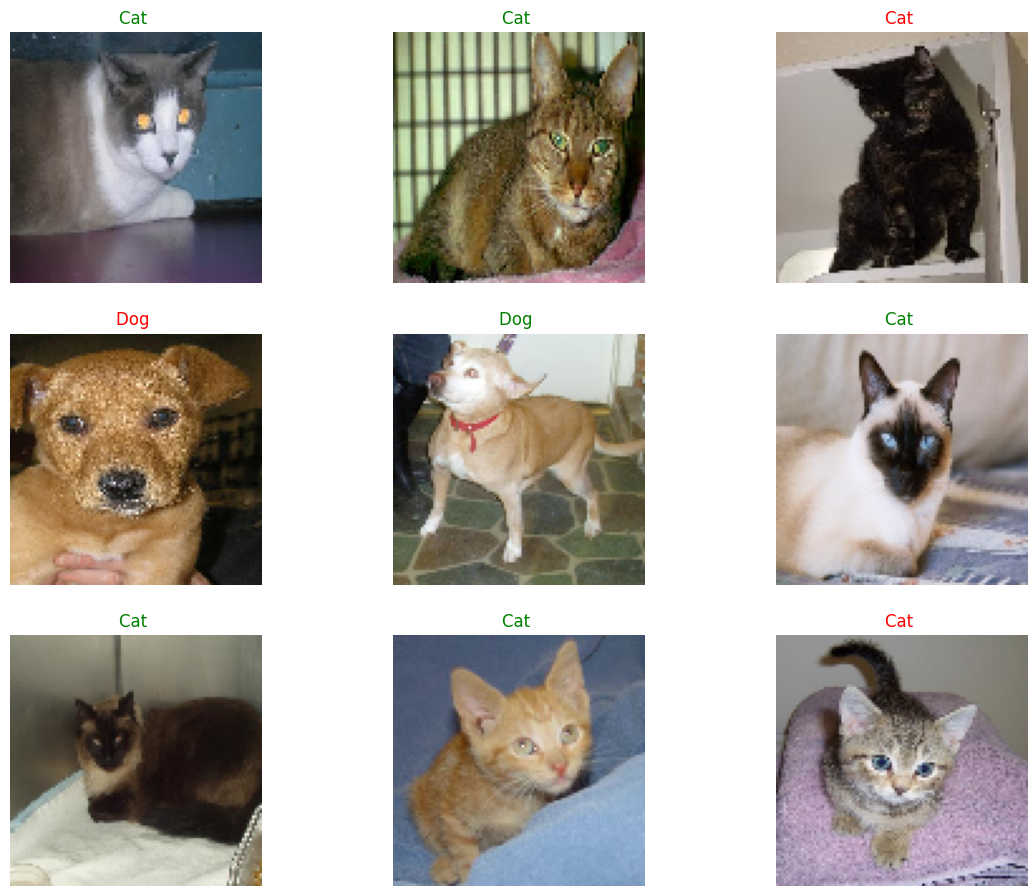

In [42]:
plot_prediction(test_generator, 9)

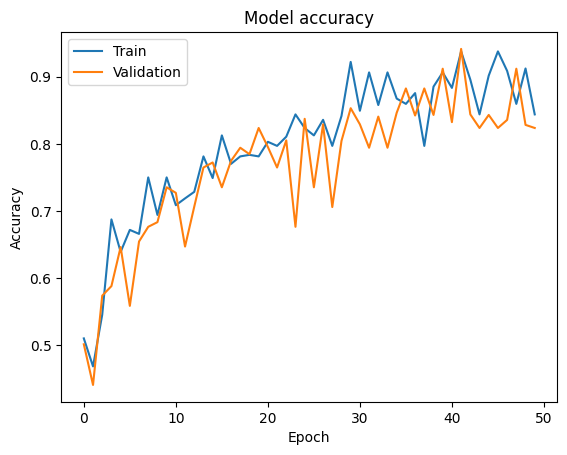

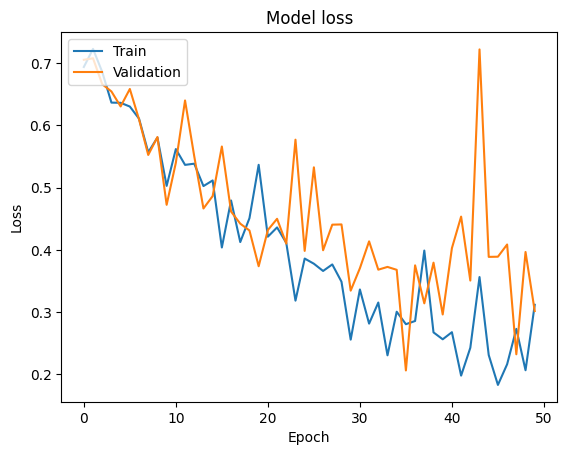

In [35]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()